# Data Science practice
## Importing modules to be used

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

### Loading the dataset


In [135]:
df = pd.read_csv('liking.csv')
df.head()

,age,gender,phonemodel
0,15.0,Male,infinix
1,NaN,Male,samsung
2,21.0,Male,samsung
3,40.0,Male,nokia
4,47.0,Male,nokia


### Data summary

In [136]:
df.describe()

,age
count,18.000000
mean,29.555556
std,10.573119
min,10.000000
25%,22.000000
50%,30.500000
75%,35.000000
max,47.000000


### Finding Missing values with missingno

#### shows there are 3 missing values in the age column

<Axes: >

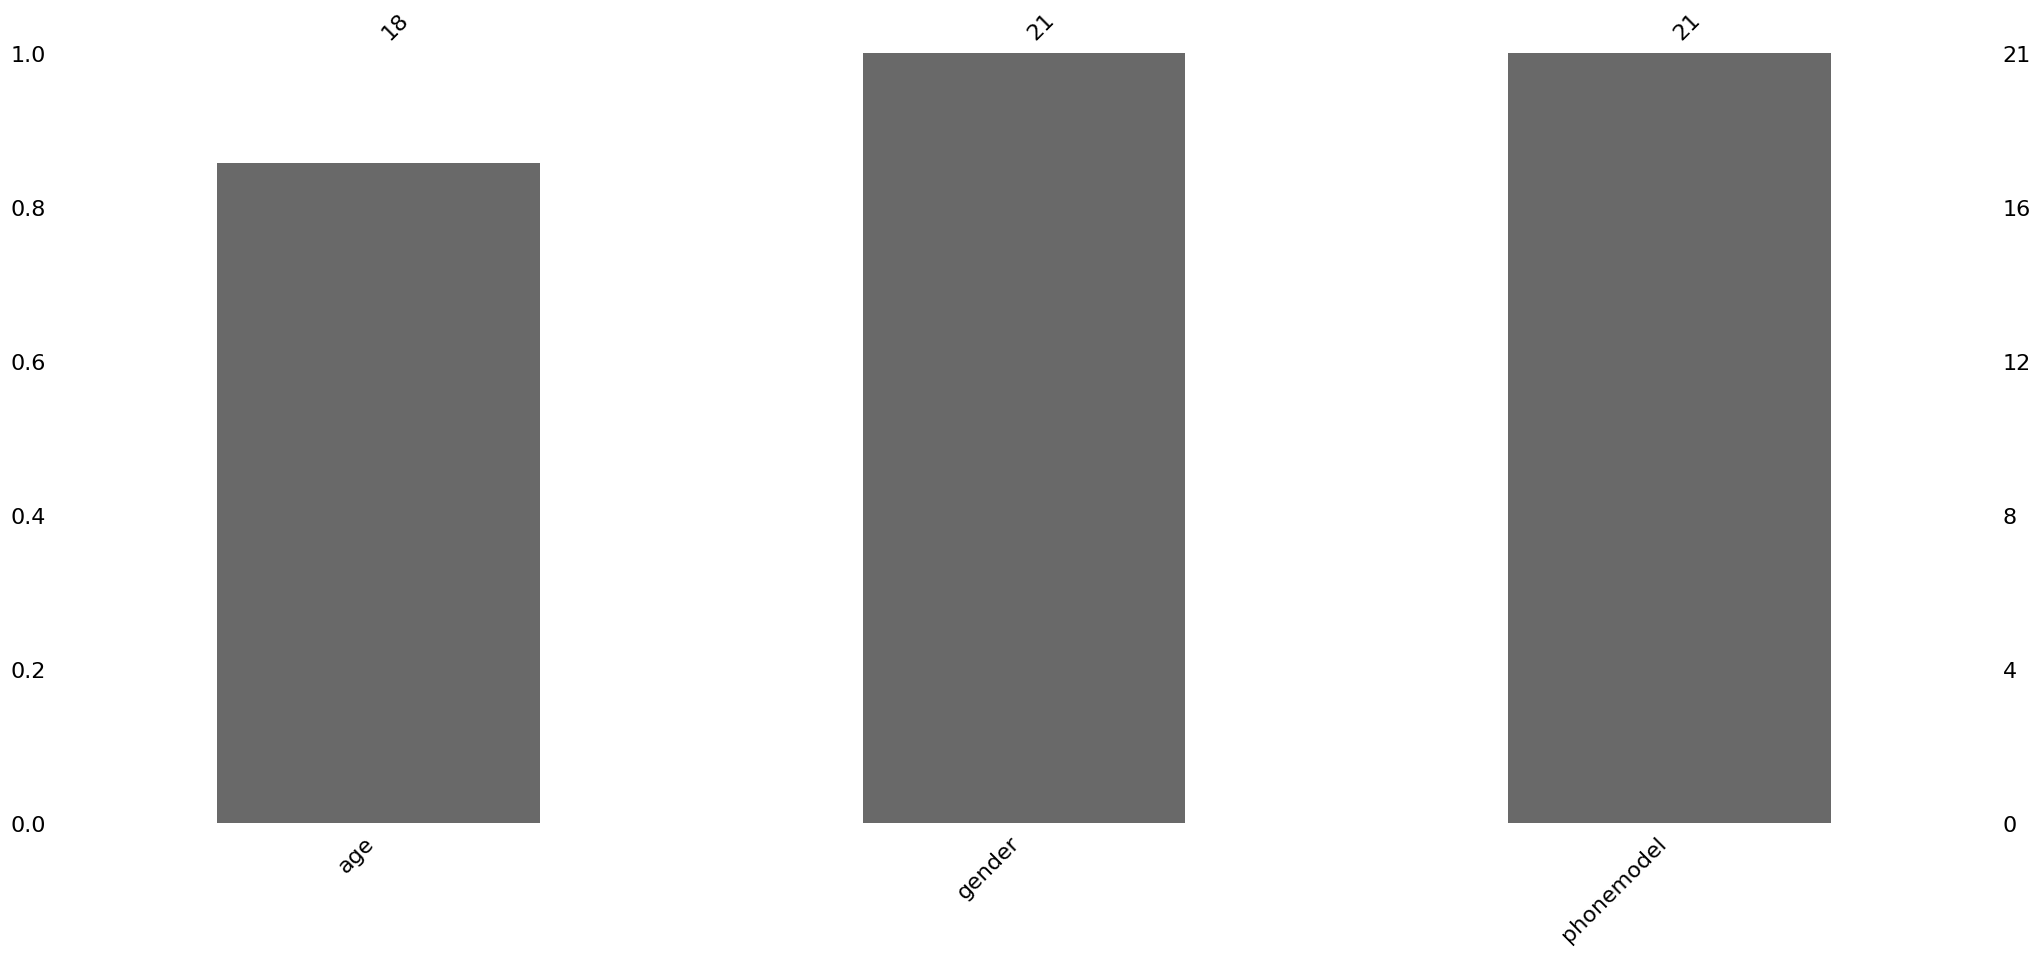

In [137]:
msno.bar(df)

#### Missing values summary 

In [138]:
df.isnull().sum()

age           3
gender        0
phonemodel    0
dtype: int64

#### Filling missing values

In [139]:
df.age = df.age.fillna(df.age.mean())

#### display data after filling for visual affirmation

<Axes: >

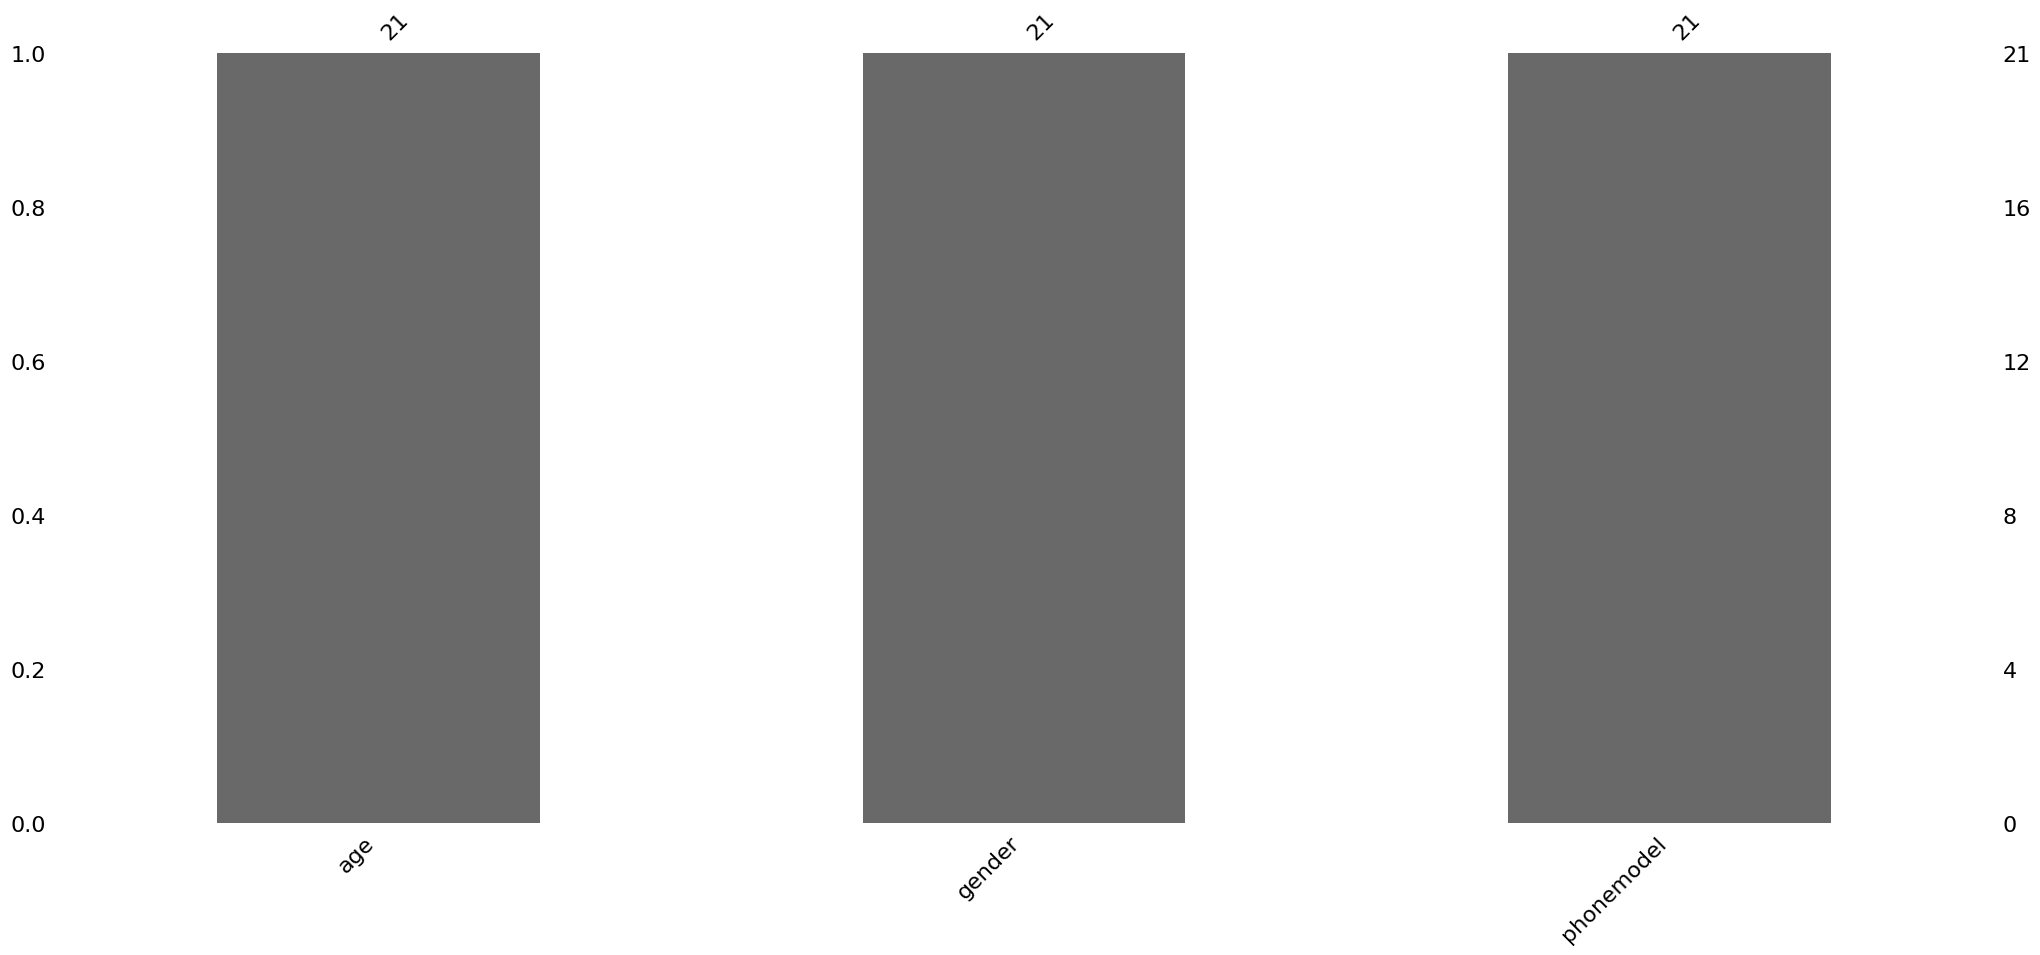

In [140]:
msno.bar(df) #All of the value are filled

In [141]:
df.isnull().sum() ## zero missing values

age           0
gender        0
phonemodel    0
dtype: int64

df.head()

## Map strings to 1s and 0s

In [142]:
df.gender

0       Male
1       Male
2       Male
3       Male
4       Male
5       Male
6       Male
7       Male
8       Male
9       Male
10    Female
11    Female
12    Female
13    Female
14    Female
15    Female
16    Female
17    Female
18    Female
19    Female
20    Female
Name: gender, dtype: object

In [143]:
mappingDict = {"Male": 1, "Female": 0} ## dict used to map 

df.gender = df.gender.replace(mappingDict) ## mapping the values

In [144]:
df.gender ##The new values of gender

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
Name: gender, dtype: int64

## Model making

### Data spliting

In [145]:
X = df.drop(columns='phonemodel')
y = df.phonemodel
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=1)


### Model fitting

In [146]:
model = RandomForestClassifier(random_state=1, max_leaf_nodes=9)
model.fit(train_X,train_y)

RandomForestClassifier(max_leaf_nodes=9, random_state=1)

### Model predictions

In [147]:
preds = model.predict(test_X)
preds

array(['iphone', 'iphone', 'iphone', 'iphone', 'oppo'], dtype=object)

### Accuracy testing

In [148]:
accuracy = accuracy_score(test_y, preds)
accuracy *= 100
accuracy

40.0